## Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

In [220]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [221]:
pokemon = pd.read_csv("../pokemon.csv", sep=",")
# pokemon.head()
# penguins.fillna(penguins.mean(), inplace=True)
# penguins = penguins[penguins['sex'].notna()]

pokemon_train, pokemon_test = train_test_split(pokemon, test_size=0.3, random_state=42, stratify=pokemon['generation'])

In [222]:
from sklearn.tree import DecisionTreeClassifier

In [223]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [224]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

# Decision tree based on generation

In [225]:
features= ['speed', 'hp', 'attack']
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(pokemon_train[features], pokemon_train['type1'])

DecisionTreeClassifier(max_depth=3)

In [226]:
predictions = dt.predict(pokemon_train[features])
predictions

array(['normal', 'rock', 'water', 'electric', 'grass', 'water', 'grass',
       'water', 'water', 'electric', 'grass', 'ground', 'water', 'water',
       'electric', 'bug', 'water', 'water', 'normal', 'normal', 'water',
       'water', 'ground', 'water', 'grass', 'water', 'grass', 'water',
       'grass', 'water', 'water', 'grass', 'water', 'water', 'water',
       'water', 'water', 'water', 'grass', 'grass', 'grass', 'water',
       'water', 'rock', 'grass', 'water', 'water', 'water', 'water',
       'normal', 'rock', 'rock', 'rock', 'grass', 'water', 'grass',
       'water', 'water', 'water', 'electric', 'grass', 'water', 'bug',
       'normal', 'rock', 'water', 'ground', 'grass', 'rock', 'water',
       'water', 'water', 'water', 'psychic', 'ground', 'water', 'water',
       'water', 'water', 'grass', 'ground', 'normal', 'electric', 'water',
       'water', 'water', 'water', 'normal', 'grass', 'water', 'normal',
       'grass', 'water', 'grass', 'water', 'normal', 'water', 'normal',

In [227]:
predictions = dt.predict(pokemon_test[features])
predictions

array(['grass', 'normal', 'electric', 'grass', 'water', 'grass', 'water',
       'bug', 'grass', 'water', 'water', 'normal', 'rock', 'water',
       'rock', 'rock', 'normal', 'water', 'grass', 'water', 'normal',
       'electric', 'grass', 'grass', 'water', 'water', 'psychic', 'water',
       'water', 'water', 'water', 'normal', 'water', 'water', 'rock',
       'water', 'electric', 'electric', 'water', 'rock', 'water', 'rock',
       'water', 'water', 'psychic', 'water', 'normal', 'normal', 'water',
       'grass', 'grass', 'water', 'rock', 'water', 'rock', 'grass',
       'water', 'water', 'water', 'normal', 'rock', 'grass', 'normal',
       'water', 'water', 'rock', 'water', 'water', 'grass', 'water',
       'water', 'electric', 'water', 'water', 'water', 'electric', 'bug',
       'electric', 'grass', 'rock', 'water', 'water', 'water', 'water',
       'water', 'water', 'water', 'water', 'water', 'rock', 'grass',
       'water', 'grass', 'rock', 'electric', 'water', 'water', 'rock',
 

In [228]:
predictionsOnTrainset = dt.predict(pokemon_train[features])
predictionsOnTestset = dt.predict(pokemon_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, pokemon_train.type1)
accuracyTest = calculate_accuracy(predictionsOnTestset, pokemon_test.type1)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.2
Accuracy on test set 0.16182572614107885


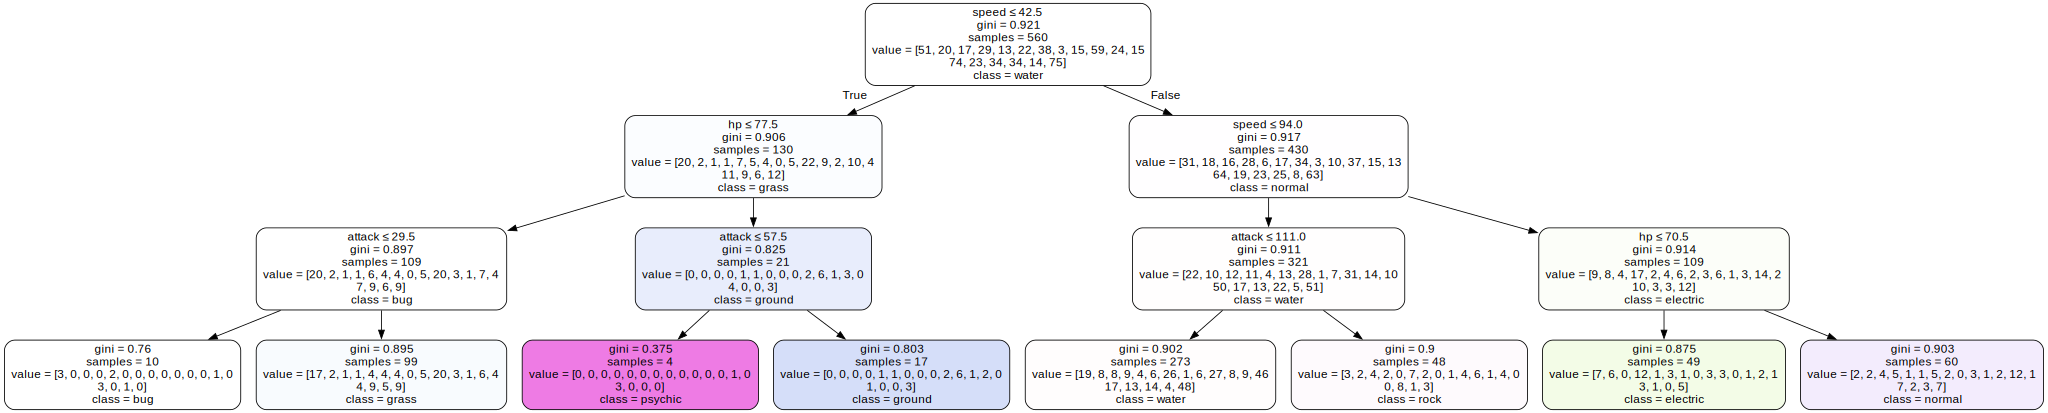

In [229]:
plot_tree_classification(dt, features, np.sort(pokemon.type1.unique()))